##  3- Análisis gráfico global  y algunas estadísticas

En este  cuaderno vamos  ver algunas de las  funciones que dispone NILMTK para realizar un diagnóstico rápido del dataset.  Asimismo también se disponen de algunas funciones para obtener datos estadísticos basados en el uso y consumo de energía de los elementos.

En primer lugar debemos cargar las  librerías como pandas,matplotlib, nilmtk y SVG .

Asimismo realizaremos otros ajustes:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet, TimeFrame
import warnings
from IPython.display import SVG

warnings. filterwarnings("ignore")
plt.style.use('bmh')



Cargamos ahora el dataset y asociamos las etiquetas para los gráficos

In [2]:
#dataset de referencia 
deps = DataSet('dsualmh.h5')



elec=deps.buildings[1].elec # Todos los medidores

print (elec)

labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x] 
    
print(Meters)


#etiquetas eje x en algunos graficos
days = [  '2023-03-07 11:10:38+01:00','2023-03-07 13:12:15+01:00' ]

colors_1 = ['tab:red','tab:brown','tab:gray','tab:pink','tab:blue','tab:orange','tab:green','tab:yellow','tab:black','tab:purple','tab:grey','tab:brown']
colors_2 = [colors_1[0]]+colors_1[10:]

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)]

Ahora vamos a realizar los gráficos con  todos los datos de potencia de forma comprimida en un solo gráfico:

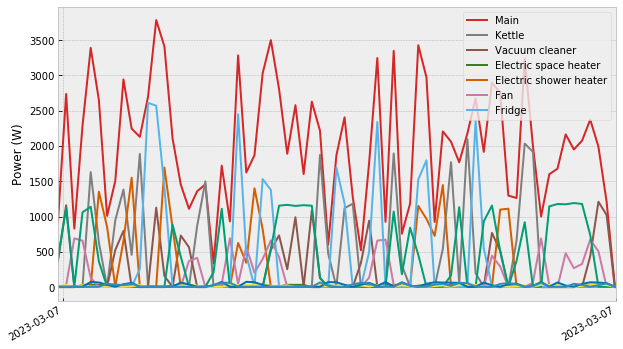

In [3]:
rcParams['figure.figsize'] = (10, 6)

tf1=TimeFrame(start='2023-03-07', end='2023-03-08')
ax=elec.select(instance=[1,2,3,4,5,6,7,8,9,10,11]).plot(timeframe=tf1)
#colores
c=0
for col in colors_2:    
    ax.get_lines()[c].set_color(col)
    c+=1    
#etiquetas
ax.legend([list(Meters.values())[0]]+list(Meters.values())[4:10])
ax.set(xticks=days[:5])
#guarda gráfico
plt.savefig('./data/images/2.5_Plot_all_meters_week1.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

Veamos ahora la relación entre la señal agregada y la suma de las mediciones individuales de los dispositivos mediante una gráfica de área mediante un método muy rápido:

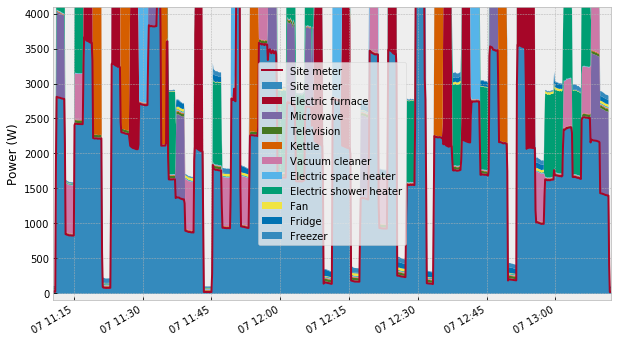

In [4]:

from nilmtk import TimeFrame
t=TimeFrame(start='2023-03-07 11:10:38+01:00', end='2023-03-07 13:12:15+01:00')
elec.select(instance=[1,2,3,4,5,6,7,8,9,10,11]).plot(kind='area',timeframe=t)

ax=elec[1].plot(timeframe=t)

ax.set(ylim=(-100,4100))
pass


In [5]:
colors_2[:11]

['tab:red', 'tab:grey', 'tab:brown']

In [6]:
t0 = '2023-03-07 11:10:38+01:00'
t1 = '2023-03-07 13:12:15+01:00'

elec.select(instance=[1,2,3,4,5,6,7,8,9,10,11]).power_series_all_data(ac_type='active', sample_period=60)[t0:t1]

Loading data for meter ElecMeterID(instance=11, building=1, dataset='dsualmh')     
Done loading data all meters for this chunk.


2023-03-07 11:11:00+01:00    4478.596680
2023-03-07 11:12:00+01:00    5220.030273
2023-03-07 11:13:00+01:00    2147.954834
2023-03-07 11:14:00+01:00    1589.444092
2023-03-07 11:15:00+01:00    3940.266113
                                ...     
2023-03-07 13:08:00+01:00    4280.763184
2023-03-07 13:09:00+01:00    3912.312988
2023-03-07 13:10:00+01:00    2869.079102
2023-03-07 13:11:00+01:00    2129.082764
2023-03-07 13:12:00+01:00      95.994705
Freq: 60S, Name: (power, active), Length: 122, dtype: float32

### Perfil de Voltaje

In [20]:
V1=next(elec[1].load())['voltage']
d = {'Indicador': ['Promedio', 'Máximo', 'Mínimo'],
     'V1':    [round(V1.mean(),1),round(V1.max(),1),round(V1.min(),1)]} #Voltaje R S T mean
     
pd.DataFrame(d)


,Indicador,V1
0,Promedio,type armonic50 0.000000 armonic15 0....
1,Máximo,type armonic50 0.000000 armonic15 0....
2,Mínimo,type armonic50 0.000000 armonic15 0....


In [21]:
V2=next(elec[2].load())['voltage']
V3=next(elec[3].load())['voltage']
V4=next(elec[4].load())['voltage']
V5=next(elec[5].load())['voltage']
V6=next(elec[6].load())['voltage']
V7=next(elec[7].load())['voltage']
V8=next(elec[8].load())['voltage']
V9=next(elec[9].load())['voltage']
V10=next(elec[10].load())['voltage']
V11=next(elec[11].load())['voltage']



In [22]:
d = {'Indicador': ['Promedio', 'Máximo', 'Mínimo'],
     'Horno':    [round(V2.mean(),1), round(V2.mean(),1), round(V2.mean(),1)], #Voltaje horno
     'Microondas':    [round(V3.max(),1),  round(V3.max(),1),  round(V3.max(),1)],  #Voltaje micor
     'Television':    [round(V4.min(),1),  round(V4.min(),1),  round(V4.min(),1)],  #Voltaje tv
     'Hervidor':    [round(V5.min(),1),  round(V5.min(),1),  round(V5.min(),1)],  #Voltaje hervidor
     'Aspiradora':    [round(V6.min(),1),  round(V6.min(),1),  round(V6.min(),1)],  #Voltaje asp
     'Estufa aceite':    [round(V7.min(),1),  round(V7.min(),1),  round(V7.min(),1)], #Voltaje estufa aceite
     'Calentador de agua':    [round(V8.min(),1),  round(V8.min(),1),  round(V8.min(),1)], #Voltaje calentador
     'Ventilador':    [round(V9.min(),1),  round(V9.min(),1),  round(V9.min(),1)], #Voltaje ventilador
     'Nevera':    [round(V10.min(),1),  round(V10.min(),1),  round(V10.min(),1)], #Voltaje nevera
     'Congelador':    [round(V11.min(),1),  round(V11.min(),1),  round(V11.min(),1)] #Voltaje estufa congelador
      } 



pd.DataFrame(d)

,Indicador,Horno,Microondas,Television,Hervidor,Aspiradora,Estufa aceite,Calentador de agua,Ventilador,Nevera,Congelador
0,Promedio,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....
1,Máximo,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....
2,Mínimo,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....,type armonic50 0.000000 armonic15 0....


## Gráfico del perfil de voltaje

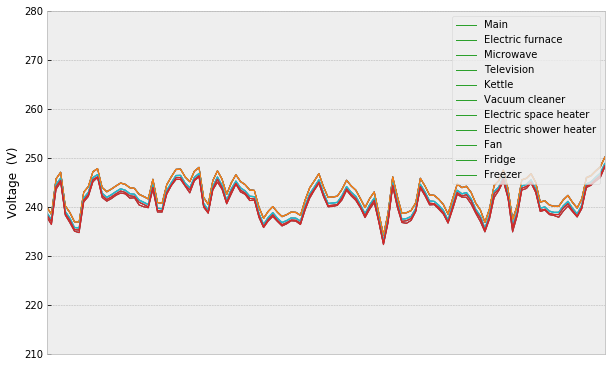

In [7]:
rcParams['figure.figsize'] = (10, 7)

#redimensina el gráfico para reducir tamaño
V1=next(elec[1].load(sample_period=60))['voltage']
V2=next(elec[2].load(sample_period=60))['voltage']
V3=next(elec[3].load(sample_period=60))['voltage']
V4=next(elec[4].load(sample_period=60))['voltage']
V5=next(elec[5].load(sample_period=60))['voltage']
V6=next(elec[6].load(sample_period=60))['voltage']
V7=next(elec[7].load(sample_period=60))['voltage']
V8=next(elec[8].load(sample_period=60))['voltage']
V9=next(elec[9].load(sample_period=60))['voltage']
V10=next(elec[10].load(sample_period=60))['voltage']
V11=next(elec[11].load(sample_period=60))['voltage']


fig, (ax1) = plt.subplots(1, 1, gridspec_kw={'hspace': 0.4})


ta = '2023-03-07 11:10:38+01:00'
tb = '2023-03-07 13:12:15+01:00'

V1[ta:tb].plot(ax=ax1, c='tab:green', lw=1)
V2[ta:tb].plot(ax=ax1, c='tab:brown', lw=1)
V3[ta:tb].plot(ax=ax1, c='tab:gray', lw=1)
V4[ta:tb].plot(ax=ax1, c='tab:pink', lw=1)
V5[ta:tb].plot(ax=ax1, c='tab:blue', lw=1)
V6[ta:tb].plot(ax=ax1, c='tab:orange', lw=1)
V7[ta:tb].plot(ax=ax1, c='tab:cyan', lw=1)
V8[ta:tb].plot(ax=ax1, c='tab:purple', lw=1)
V9[ta:tb].plot(ax=ax1, c='tab:grey', lw=1)
V10[ta:tb].plot(ax=ax1, c='tab:brown', lw=1)
V11[ta:tb].plot(ax=ax1, c='tab:red', lw=1)


ax1.legend(list(Meters.values())[0:11], loc='upper right')
ax1.set(ylim=(210,280))
ax1.set(ylabel='Voltage  (V)')
ax1.set(xticks=days[1:])


#guarda gráfico
plt.savefig('./data/images/2.8_voltage_profile.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

### Datos faltantes

Los datos faltantes, huecos o gaps están determinados por los metadatos de cada tipo de medidor, específicamente en el ajuste del parámetro max_sample_period. Este valor indica el tiempo máximo que se tolera entre mediciones sin que se considere que el medidor está apagado

In [24]:
elec[1].good_sections(full_results=True).combined() #secciones buenas Main_RST

[TimeFrame(start='2023-03-07 11:10:38+01:00', end='2023-03-07 13:12:15+01:00', empty=False)]

Visualizar de manera gráfica los datos faltantes 

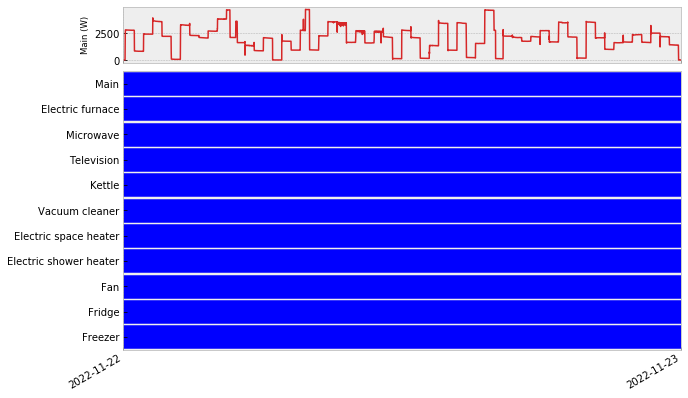

In [25]:
rcParams['figure.figsize'] = (10, 7)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.05,'height_ratios':[1,5]})

elec[1].power_series_all_data().plot(ax=ax1, c='tab:red', lw=1.5)
ax1.set_ylabel('Main (W)', fontsize=8.5)
ax1.minorticks_off()

elec.plot_good_sections(ax=ax2)
ax2.set_yticklabels(reversed(list(Meters.values())))
ax2.grid(axis='y')
ax2.set(xticks=days)
l=['2022-11-22','2022-11-23','2022-11-24']
ax2.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('./data/images/2.9_good_sections.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

### Tasa de abandono y tiempo de funcionamiento

#### Tasa de abandono
Sin contar cuando el sistema no registra datos superando el tiempo máximo de muestreo, aunque también se perciben perdidas de datos debido al propio sistema de adquisición, lo cual se le llama abandono o dropout. 

La tasa de abandono (dropout rate) es por tanto  un número entre 0 y 1 que especifica la proporción de muestras faltantes. Una tasa de abandono de 0 significa que no faltan muestras y un valor de 1 significaría que faltan todas las muestras (100%). 

#### Tiempo de funcionamiento
El tiempo de funcionamiento calculado estará condicionado al parámetro max_sample_period de cada medidor especificado en los metadatos. Si no se han registrado datos pasado  ese tiempo, se considera el medidor como apagado.

In [26]:
a=[]; b=[]; c=[]
for meter, name in Meters.items():
    a.append(name)
    b.append(str(meter.uptime())) #tiempo de funcionamiento
    c.append(round(meter.dropout_rate()*100,1)) #tasa de abandono

a.append('Total')
b.append(str(elec.uptime()))
c.append(round(elec.dropout_rate()*100,1))
    
df=pd.DataFrame(data=[b,c], columns=a, index=['Uptime','Dropout Rate']).transpose()
df

Calculating dropout_rate for ElecMeterID(instance=9, building=1, dataset='dsualmh') ...    dropout_rate for ElecMeterID(instance=4, building=1, dataset='dsualmh') ...    dropout_rate for ElecMeterID(instance=10, building=1, dataset='dsualmh') ...    ElecMeterID(instance=11, building=1, dataset='dsualmh') ...   

,Uptime,Dropout Rate
Main,0 days 02:01:37,0
Electric furnace,0 days 02:01:37,0
Microwave,0 days 02:01:37,0
Television,0 days 02:01:37,0
Kettle,0 days 02:01:37,0
Vacuum cleaner,0 days 02:01:37,0
Electric space heater,0 days 02:01:37,0
Electric shower heater,0 days 02:01:37,0
Fan,0 days 02:01:37,0
Fridge,0 days 02:01:37,0


### Registro de actividad

Periodos de tiempo en que se registra una medición superior a un umbral definido (incluyendo peaks).

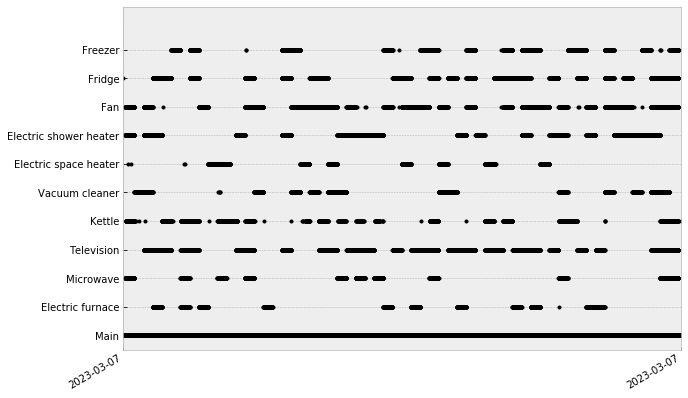

In [27]:
rcParams['figure.figsize'] = (10, 7)

Devices=elec.select(instance=[1,2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
ax=Devices.plot_when_on(on_power_threshold=10) #umbral de 80 W

#etiquetas
ax.set_yticklabels(list(Meters.values())[0:11])
ax.set(xticks=days)

#guarda gráfico
plt.savefig('./data/images/2.10_On_power1.pdf', bbox_inches='tight', transparent=True)
plt.savefig('./data/images/2.10_On_power1.png', bbox_inches='tight', transparent=True, dpi=1200)
#formatos savefig: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz, evitar guardar .svg por el tamaño del archivo (50Mb)
plt.show()
pass


### Graficos de Actividad por dispositivo y por día

Veamos ahora el gráfico por Actividad para cada  dispositivo por día.

In [28]:
colors_1 = ['tab:red','tab:orange','tab:red','tab:blue','tab:grey','tab:pink','tab:green','tab:blue','tab:gray','tab:orange','tab:green','tab:yellow','tab:black','tab:purple','tab:grey','tab:brown']
#colors_1

IndexError: list index out of range

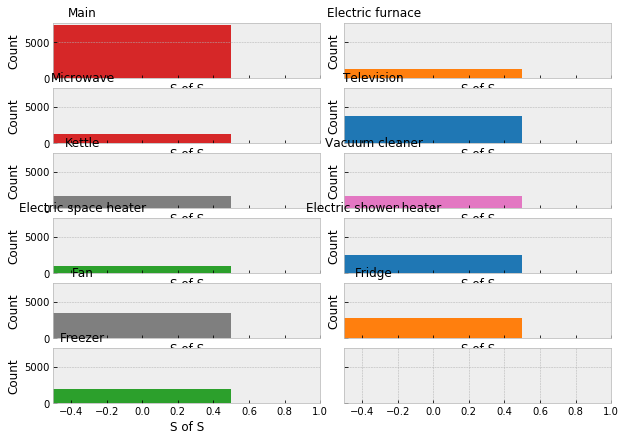

In [29]:
#rcParams['figure.figsize'] = (12, 10)
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12)) = plt.subplots(6, 2, sharex=True, sharey=True, 
                                                                 gridspec_kw={'hspace': 0.17, 'wspace': 0.09})

m=0



for ax in fig.get_axes(): 
    list(Meters)[m].plot_activity_histogram(ax=ax, period='S', #periodo en segundos
                                            bin_duration='S', #duración en segundos
                                            on_power_threshold=10, #umbral de 10w
                                            plot_kwargs={'color':colors_1[m]})
    #labels
    ttl=ax.set_title(labels['Meters'][m], fontsize=12)
    ttl.set_position([.11, 1])
    m=m+1
    ax.grid(axis='x')

ax1.set(ylim=[0,9])
ax1.set(yticks=[0,1,2,3,4,5,6,7,8,9])
ax1.set(xticks=list(range(0,24)))
#labels
ax1.set(xlabel='')
ax2.set(xlabel='',ylabel='')
ax3.set(xlabel='')
ax4.set(xlabel='',ylabel='')
ax6.set(ylabel='')

#guarda gráfico
plt.savefig('./data/images/2.12_Activity_histogram.svg',bbox_inches='tight', transparent=True)
plt.show()
pass

# APARECE UN ERROR MINIMO POR LA PRESENTACION DE 6X2 AL TENER SOLO 11 ELEMENTOS

### Mapa de calor con las mediciones de potencia activa del medidor Main 

Ahora veamos una representación de las potencias activas para el medidor principal para el periodo de una semana.

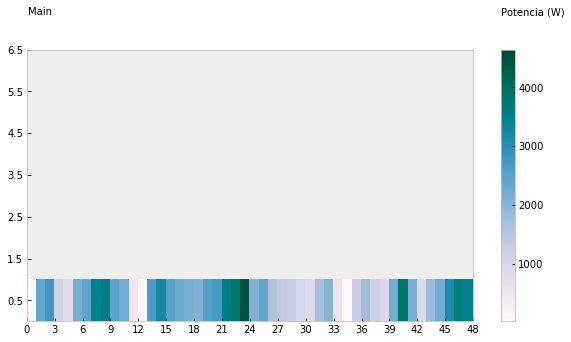

In [9]:
import numpy as np
import pandas as pd

d=elec[1].power_series_all_data(sample_period=60, resample_kwargs={'how': 'mean'}).to_frame()
d.fillna(0,inplace=True)

#tomamos la potencia activa como referencia
d.columns=['active']

#indices para la consulta
d['weekday']=d.index.weekday
d['time']=d.index.time

matrix=d.groupby(['weekday','time']).active.mean().unstack().values

plt.figure(figsize=(10, 5))
ax = plt.gca()
plt.pcolor(matrix,cmap='PuBuGn')
plt.xlim([0,48])
ax.set_xticks(np.arange(0,49,3))
#ax.set_xticklabels(['10:00','10:15','10:30','10:45','11:00',
#                    '11:15','11:30','11:45','12:00','12:15','12:30','12:45','13:00','13:15','13:30','13:45','14:00'],rotation=30)
ax.set_yticks(np.arange(0.5,7))
#ax.set_yticklabels(['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'])
plt.colorbar()
ax.text(0.1, 7.4, 'Main', ha='left', va='center')
ax.text(51, 7.4, 'Potencia (W)', ha='left', va='center') 

plt.savefig('./data/images/2.13_Use_power1.svg', bbox_inches='tight', transparent=True)
plt.show()

### Estadísticas de energía

Cálculo de la energía total, es decir , las potencias activa, reactiva y aparente.

In [10]:
elec[1].total_energy()

active      4.112951
reactive    0.183257
apparent    4.127224
dtype: float64

Cálculo de la energía (potencia activa) por medidores

In [11]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='H').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='W'

#energía por submedidor kwH total
#d3=elec.energy_per_meter(ac_type=['active']).round(2) # kWh, per_period='D'
d3=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'


df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()
df.index = [list(labels['Meters'])]
df.columns = ['kWh Hora','kWh Dia.','Total kWh']
df

11/11 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,kWh Hora,kWh Dia.,Total kWh
Main,2.03,48.70,48.70
Electric furnace,0.38,9.18,9.18
Microwave,0.22,5.17,5.17
Television,0.02,0.48,0.48
Kettle,0.25,6.09,6.09
Vacuum cleaner,0.16,3.88,3.88
Electric space heater,0.37,8.91,8.91
Electric shower heater,0.41,9.83,9.83
Fan,0.02,0.49,0.49
Fridge,0.04,0.85,0.85


### Proporción de energía submedida respecto a la medición agregada.

Se usa la función original  proportion_of_energy_submetered que se ha modificado para representar correctamente las etiquetas, dando paso a proportion_of_energy_submetered_2 en  donde se pueden especificar por separado el medidor principal y los submedidores. Esta funcion se integra en metergroup.py  que almacenamos en users\USUARIO\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\metergroup.py

In [12]:
Devices=elec.select(instance=[1,2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
elec.proportion_of_energy_submetered_2(elec[1], Devices, ac_type='active')

Running MeterGroup.proportion_of_energy_submetered...


1.9338175234226074

In [13]:
Devices=elec.select(instance=[1,2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
elec.proportion_of_energy_submetered_2(elec[1], Devices, ac_type='reactive')

Running MeterGroup.proportion_of_energy_submetered...


2.063987916185484

In [14]:
Devices=elec.select(instance=[1,2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
elec.proportion_of_energy_submetered_2(elec[1], Devices, ac_type='apparent')

Running MeterGroup.proportion_of_energy_submetered...


1.9388601356720716

### Síntesis del dataset
NILMTK ofrece una función que permite obtener un resumen de un MeterGroup en base a los medidores que contiene. Esta función engloba varias de las funciones que se han ejecutado anteriormente.

In [15]:
elec.describe(elec.select(instance=[2,3,4,5,6,7,8,9,10,11]))

Running MeterGroup.correlation_of_sum_of_submeters_with_mains...
Loading data for meter ElecMeterID(instance=11, building=1, dataset='dsualmh')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=11, building=1, dataset='dsualmh')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=11, building=1, dataset='dsualmh')     
Done loading data all meters for this chunk.
Running MeterGroup.proportion_of_energy_submetered...
Calculating dropout_rate for ElecMeterID(instance=11, building=1, dataset='dsualmh') ...   

total_n_meters                                                                               11
total_n_site_meters                                                                           1
correlation_of_sum_of_submeters_with_mains                                             0.984632
proportion_of_energy_submetered                                                         0.93886
dropout_rates_ignoring_gaps                                          min=0.0, mean=0.0, max=0.0
mains_sample_period                                                                          60
submeter_sample_period                                                                       60
timeframe                                     start=2023-03-07 11:10:38+01:00, end=2023-03-0...
total_duration                                                                  0 days 02:01:37
mains_uptime                                                                    0 days 02:01:37
proportion_uptime                       